<a href="https://colab.research.google.com/github/rashmic20/Phase5_Project/blob/main/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('restaurant_reviews_cleaned.csv')

In [4]:
# Group by state and count the number of reviews
state_review_counts = df.groupby('state').size().reset_index(name='review_count')

# Display the review counts per state
print(state_review_counts)

   state  review_count
0     AB           936
1     AZ          7437
2     CA          5252
3     DE           959
4     FL         25548
5     ID          3108
6     IL          1033
7     IN         10098
8     LA         14498
9     MO          9279
10    NC             1
11    NJ          5072
12    NV          6823
13    PA         22380
14    TN         13530


 Number of reviews per state

<ipython-input-5-2fb2409e7bf7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)


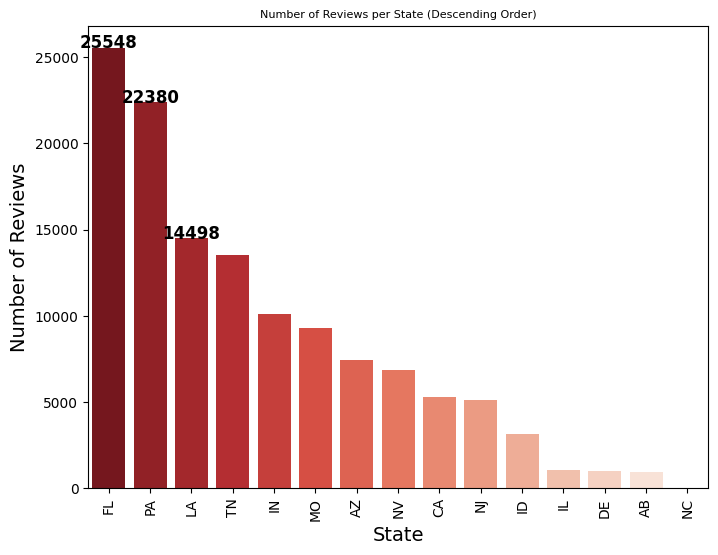

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by review_count in descending order
state_review_counts = state_review_counts.sort_values(by='review_count', ascending=False).reset_index(drop=True)

# Create a custom red palette where higher numbers are darker
red_palette = sns.color_palette("Reds", len(state_review_counts))
red_palette.reverse()  # Reverse the palette to make higher numbers darker

# Plotting the number of reviews per state in descending order with the custom red palette
plt.figure(figsize=(8,6))
sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)
plt.title('Number of Reviews per State (Descending Order)', fontsize=8)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=90)

# Annotate the top 3 states
for i in range(3):
    plt.text(i, state_review_counts['review_count'][i] + 5,
             f'{state_review_counts["review_count"][i]}',
             color='black', ha="center", fontsize=12, fontweight='bold')

plt.show()


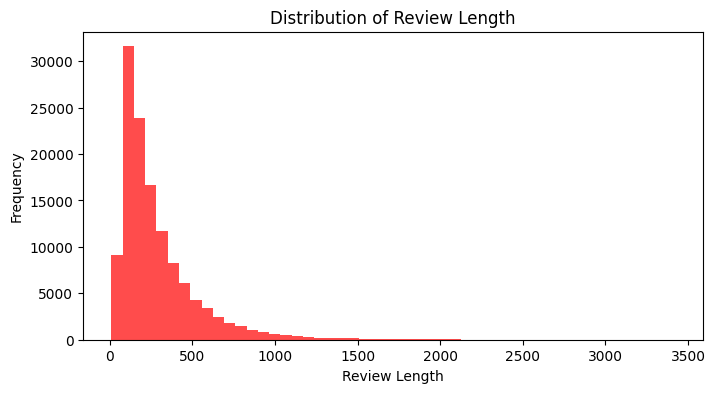

In [6]:
df['review_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(8, 4))
plt.hist(df['review_length'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

Let's filter dataset for reviews from the states of Florida (FL), Pennsylvania (PA), and Los Angeles (LA)

In [8]:
# Filter for reviews in FL, PA, and LA
filtered_df = df[df['state'].isin(['FL', 'PA', 'LA'])]


In [9]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62426 entries, 1 to 125952
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_id      62426 non-null  object 
 1   user_id        62426 non-null  object 
 2   business_id    62426 non-null  object 
 3   stars_x        62426 non-null  int64  
 4   date           62426 non-null  object 
 5   name           62426 non-null  object 
 6   city           62426 non-null  object 
 7   state          62426 non-null  object 
 8   postal_code    62426 non-null  object 
 9   latitude       62426 non-null  float64
 10  longitude      62426 non-null  float64
 11  stars_y        62426 non-null  float64
 12  review_count   62426 non-null  int64  
 13  categories     62426 non-null  object 
 14  cleaned_text   62426 non-null  object 
 15  sentiment      62426 non-null  float64
 16  review_length  62426 non-null  int64  
dtypes: float64(4), int64(3), object(10)
memory usage: 8.6+

In [10]:
# Count the number of reviews (length of the 'stars_x' column) for each state
review_counts = filtered_df.groupby('state')['stars_x'].count()

# Display the number of reviews for each state
print(review_counts)

state
FL    25548
LA    14498
PA    22380
Name: stars_x, dtype: int64


Import Libraries for text preprocessing

In [11]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Remove stopwords

In [12]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


Create bigram and trigram models to form Bigrams and Trigrams

In [13]:
# Create bigram and trigram models

# Assuming you have a pandas DataFrame named 'df' with a column 'cleaned_text'
# Import pandas
import pandas as pd

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = stopwords.words('english')

# Example DataFrame (replace with your actual data)
filtered_df = pd.DataFrame({'cleaned_text': ["This is the first document.", "This document is the second document.", "And this is the third one.", "Is this the first document?"]})

# Preprocess and tokenize the 'cleaned_text' column using simple_preprocess
texts = [simple_preprocess(doc) for doc in df['cleaned_text']]

# Create bigram and trigram models
bigram = Phrases(texts, min_count=5, threshold=100)
trigram = Phrases(bigram[texts], threshold=100)

# Faster way to get a sentence with bigrams/trigrams
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization: To reduce words to their base form, but here we’ll limit it to nouns, verbs, and adjectives.

In [14]:
# Initialize spacy 'en' model, keeping only tagger component (for lemmatization)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Lemmatize the words, keeping only nouns, adjectives, verbs, and adverbs"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


Apply the Preprocessing Steps

In [15]:
# Assume 'texts' is a list of tokenized text data

# Remove stopwords
texts_nostops = remove_stopwords(texts)

# Form bigrams
texts_bigrams = make_bigrams(texts_nostops)

# Form trigrams
texts_trigrams = make_trigrams(texts_bigrams)

# Lemmatization keeping only nouns, adjectives, verbs, and adverbs
texts_lemmatized = lemmatization(texts_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB'])


Create Dictionary and Corpus

In [16]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(texts_lemmatized)

# Filter out extremes to limit the number of features
id2word.filter_extremes(no_below=15, no_above=0.5)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts_lemmatized]

Now we have id2word (the dictionary) and corpus (the term-document frequency) ready to be used for LDA modeling.

In [17]:
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [18]:
# Define the number of topics
num_topics = 5  # You can adjust this based on your dataset and objectives

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=num_topics,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.042*"go" + 0.032*"get" + 0.031*"make" + 0.027*"restaurant" + 0.026*"try" + 0.023*"eat" + 0.023*"ve" + 0.023*"place" + 0.017*"m" + 0.014*"look"
Topic: 1 
Words: 0.032*"chicken" + 0.030*"pizza" + 0.026*"fry" + 0.025*"sauce" + 0.022*"taste" + 0.020*"sandwich" + 0.020*"flavor" + 0.019*"salad" + 0.018*"cheese" + 0.017*"side"
Topic: 2 
Words: 0.064*"table" + 0.036*"sit" + 0.033*"bar" + 0.031*"seat" + 0.020*"dining" + 0.018*"reservation" + 0.015*"parking" + 0.014*"room" + 0.014*"stay" + 0.014*"beef"
Topic: 3 
Words: 0.065*"good" + 0.056*"food" + 0.046*"great" + 0.030*"place" + 0.027*"service" + 0.021*"love" + 0.018*"amazing" + 0.018*"staff" + 0.016*"come" + 0.015*"nice"
Topic: 4 
Words: 0.064*"order" + 0.036*"time" + 0.025*"get" + 0.025*"take" + 0.023*"wait" + 0.023*"come" + 0.022*"say" + 0.021*"food" + 0.015*"ask" + 0.014*"tell"


Evaluate the model

In [19]:
# Compute Perplexity (a measure of how well the model fits the data; lower is better)
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)





Perplexity:  -6.849336863199462

Coherence Score:  0.5475409147492368


Coherence score of 0.547 suggests that there is room for improvement. Lets work on LDA in package gensism.